# Computational Lab: Reconstructing the $p$–$n$ Junction Band Diagram

## 0. Purpose and Learning Outcomes

In this lab you will **numerically reconstruct** the equilibrium $p$–$n$ junction band diagram starting from:

- doping profiles $N_A$, $N_D$,
- Poisson’s equation,
- drift–diffusion relations.

By the end you should be able to:

1. Compute **pre-contact** band edges and Fermi levels for separate $p$ and $n$ regions.
2. Compute the **built-in potential** $V_{\mathrm{bi}}$ and **depletion widths** $W_p$, $W_n$.
3. Solve **1D Poisson’s equation numerically** to obtain $\phi(x)$ and $E(x)$.
4. Construct **band edges** $E_C(x)$, $E_V(x)$ and **carrier profiles** $n(x)$, $p(x)$.
5. Compute **drift** and **diffusion** components of $J_n(x)$ and show they cancel at equilibrium.

You are expected to write your own Python code (NumPy + matplotlib). You may reuse your own utility code from earlier labs.

---

## 1. Model Setup and Assumptions

You may choose any physically reasonable semiconductor and parameters, but you must:

- Treat a **1D, abrupt $p$–$n$ junction** with uniform doping on each side.
- Work at a fixed temperature $T$ (e.g., $T = 300\ \text{K}$).
- Assume:
  - non-degenerate statistics (Boltzmann),
  - full ionization of dopants,
  - low-level injection,
  - 1D electrostatics.

### 1.1. Material and Device Parameters (to be chosen by you)

Pick and document:

- $T$ (K)
- $\varepsilon_r$ and $\varepsilon_s = \varepsilon_r \varepsilon_0$
- bandgap $E_g$ (eV)
- intrinsic concentration $n_i$ (m$^{-3}$)
- mobilities $\mu_n$, $\mu_p$ (m$^2$/V·s)
- $p$-side doping $N_A$ (m$^{-3}$)
- $n$-side doping $N_D$ (m$^{-3}$)

**Task 1.1 (code + explanation)**

1. Define these parameters in a Python cell.
2. Print them with units.
3. Explain in 2–3 sentences why your choices are reasonable for a real semiconductor.

---

## 2. Before Contact: Separate $p$ and $n$ Regions

We want to reproduce panel (a) of the schematic: **two isolated, flat-band regions** with different Fermi levels.

Assume in each region:

- intrinsic level $E_i$ is at midgap:
  $$
  E_i = \frac{E_C + E_V}{2}.
  $$
- For non-degenerate doping, the Fermi level relative to $E_i$ is:
  $$
  E_F - E_i =
  \begin{cases}
    -k_B T \ln\!\left(\dfrac{N_A}{n_i}\right)/q, & \text{$p$-type}\\[6pt]
    +k_B T \ln\!\left(\dfrac{N_D}{n_i}\right)/q, & \text{$n$-type}
  \end{cases}
  $$

### 2.1. Band Edges and Fermi Levels

**Task 2.1 (derivation + code)**

1. Derive the expressions above starting from
   $$
   p_0 = N_V \exp\!\left(-\dfrac{E_F - E_V}{k_B T}\right),\qquad
   n_0 = N_C \exp\!\left(-\dfrac{E_C - E_F}{k_B T}\right),
   $$
   and $n_0 p_0 = n_i^2$ (you may assume non-degenerate conditions and $N_A \gg n_i$ or $N_D \gg n_i$).
2. Implement Python functions that, given $(N_A, N_D, n_i, T, E_g)$, return:
   - $E_{F,p}$, $E_{F,n}$ (in eV),
   - $E_{C,p}$, $E_{V,p}$, $E_{C,n}$, $E_{V,n}$, with $E_i$ chosen as reference (e.g., $E_i = 0$).
3. Create a simple 1D coordinate $x$ with:
   - $x \in [-L_p, 0]$ for the $p$ region,
   - $x \in [0, L_n]$ for the $n$ region (you may take $L_p = L_n = 1$ in arbitrary units).
4. Plot two separate flat-band diagrams:
   - $E_C(x)$, $E_V(x)$, $E_F(x)$ in the $p$ region.
   - $E_C(x)$, $E_V(x)$, $E_F(x)$ in the $n$ region.

**Check:** You should see $E_{F,p}$ closer to $E_V$ and $E_{F,n}$ closer to $E_C$, with $E_{F,p} \neq E_{F,n}$.

---

## 3. After Contact: Built-In Potential and Depletion Width

Once the regions are joined and allowed to reach thermal equilibrium, charge flows until there is:

- a **single Fermi level** $E_F$ (constant in $x$),
- a **built-in potential** $V_{\mathrm{bi}}$,
- a **depletion region** of width $W_p$ on the $p$ side and $W_n$ on the $n$ side.

### 3.1. Built-In Potential

The built-in potential for an abrupt junction is:
$$
V_{\mathrm{bi}} =
\frac{k_B T}{q} \ln\!\left(\frac{N_A N_D}{n_i^2}\right).
$$

### 3.2. Depletion Widths (Depletion Approximation)

At zero applied bias:
$$
W =
\sqrt{
\frac{2 \varepsilon_s}{q}
\left(
\frac{N_A + N_D}{N_A N_D}
\right)
V_{\mathrm{bi}}
},
$$
with partitioning:
$$
W_n = \frac{N_A}{N_A + N_D} W,\qquad
W_p = \frac{N_D}{N_A + N_D} W.
$$

**Task 3.1 (code + checks)**

1. Implement functions:
   - `V_bi = builtin_potential(NA, ND, ni, T)`,
   - `(W, Wp, Wn) = depletion_widths(NA, ND, V_bi, eps_s)`.
2. Compute $V_{\mathrm{bi}}$, $W$, $W_p$, $W_n$ for your chosen doping.
3. Print these in SI units and in $\mu\text{m}$.
4. Verify numerically that the total charge in each depletion region is equal and opposite:
   $$
   Q_p = -q N_A W_p,\qquad
   Q_n = +q N_D W_n,\qquad
   Q_p + Q_n \approx 0.
   $$

Explain in 2–3 sentences why $|Q_p| = |Q_n|$ must hold.

---

## 4. Numerical Poisson Solver for $\phi(x)$ and $E(x)$

We now move from analytic depletion widths to a **numerical solution of Poisson’s equation** to obtain the spatial dependence of:

- electric field $E(x)$,
- electrostatic potential $\phi(x)$,
- band edges $E_C(x)$ and $E_V(x)$.

### 4.1. Charge Density Profile

Under the depletion approximation:
$$
\rho(x) =
\begin{cases}
-q N_A, & -W_p < x < 0,\\[4pt]
+q N_D, & 0 < x < W_n,\\[4pt]
0, & \text{outside depletion}.
\end{cases}
$$

**Task 4.1 (code)**

1. Construct a 1D grid $x_i$ from $-L_{\text{left}}$ to $L_{\text{right}}$, where:
   - $L_{\text{left}} \geq W_p$,
   - $L_{\text{right}} \geq W_n$.
2. Implement a function that returns $\rho(x_i)$ according to the piecewise definition above.
3. Plot $\rho(x)$ to verify that it is negative on the $p$ side, positive on the $n$ side, and zero outside $[-W_p, W_n]$.

### 4.2. Solving Poisson’s Equation

The 1D Poisson equation in terms of potential is:
$$
\frac{d^2 \phi}{dx^2} = -\frac{\rho(x)}{\varepsilon_s}.
$$

You will solve this on the grid using a **finite-difference** approximation:

- Approximate $\dfrac{d^2 \phi}{dx^2}$ using central differences.
- Impose boundary conditions (you may choose, for example, $\phi(-L_{\text{left}}) = 0$ and $\phi(L_{\text{right}}) = V_{\mathrm{bi}}$, or fix $\phi$ at both ends so that the total drop across the depletion region equals $V_{\mathrm{bi}}$).

**Task 4.2 (derivation + code)**

1. Derive the discrete equation for interior points:
   $$
   \frac{\phi_{i+1} - 2\phi_i + \phi_{i-1}}{\Delta x^2}
   = -\frac{\rho_i}{\varepsilon_s}.
   $$
2. Assemble the corresponding **tridiagonal linear system** $\mathbf{A}\boldsymbol{\phi} = \mathbf{b}$.
3. Solve for $\phi_i$ using NumPy’s linear solver.
4. Compute the discrete electric field:
   $$
   E_i \approx -\frac{\phi_{i+1} - \phi_{i-1}}{2\Delta x}.
   $$
5. Plot:
   - $\phi(x)$,
   - $E(x)$.

**Check:** The potential drop across the depletion region should be close to $V_{\mathrm{bi}}$ (within numerical error).

---

## 5. Band Edges and Carrier Profiles from $\phi(x)$

Given $\phi(x)$, you can construct the band edges (up to an arbitrary additive constant):

- Electrostatic energy for an electron is $-q \phi(x)$.
- Define:
  $$
  E_C(x) = -q \phi(x) + C_0,\qquad
  E_V(x) = E_C(x) - E_g.
  $$
- Choose the constant $C_0$ so that $E_F = 0$ (or any convenient reference).

In non-degenerate conditions, the carrier densities can be approximated from the local band edges and Fermi level:
$$
n(x) \approx n_i \exp\!\left(\frac{E_F - E_i(x)}{k_B T}\right),\qquad
p(x) \approx n_i \exp\!\left(\frac{E_i(x) - E_F}{k_B T}\right),
$$
where $E_i(x)$ is the local intrinsic level (midgap):
$$
E_i(x) = \frac{E_C(x) + E_V(x)}{2}.
$$

### 5.1. Constructing $E_C(x)$ and $E_V(x)$

**Task 5.1 (code)**

1. Choose a reference such that $E_F = 0$ everywhere.
2. Compute $E_C(x)$ and $E_V(x)$ from $\phi(x)$ and $E_g$.
3. Plot $E_C(x)$, $E_V(x)$, and $E_F(x)$ on the same axes.
4. Overlay the depletion region $[-W_p, W_n]$ on this plot (e.g., with shading).

You should now have a band diagram that qualitatively matches the schematic.

### 5.2. Computing $n(x)$ and $p(x)$

**Task 5.2 (code + analysis)**

1. Compute $E_i(x)$ from $E_C(x)$ and $E_V(x)$.
2. Using your chosen $E_F$ (constant), compute $n(x)$ and $p(x)$ on the grid.
3. Plot $n(x)$ and $p(x)$ on a semilog scale to show:
   - high $p$ on the $p$ side,
   - high $n$ on the $n$ side,
   - depletion of both in the depletion region.
4. Evaluate $n(x)p(x)$ and compare to $n_i^2$ in the quasi-neutral regions.

Explain whether $n(x)p(x) \approx n_i^2$ holds where you expect equilibrium bulk behavior.

---

## 6. Drift and Diffusion Currents at Equilibrium

We now numerically verify that **drift and diffusion cancel** at equilibrium.

The electron current density is:
$$
J_n(x) = q n(x) \mu_n E(x) + q D_n \frac{dn}{dx},
$$
where:
$$
D_n = \frac{k_B T}{q} \mu_n
$$
(Einstein relation).

Similarly for holes:
$$
J_p(x) = q p(x) \mu_p E(x) - q D_p \frac{dp}{dx},\qquad
D_p = \frac{k_B T}{q} \mu_p.
$$

At equilibrium, we expect:
$$
J_n(x) \approx 0,\qquad
J_p(x) \approx 0.
$$

**Task 6.1 (code + interpretation)**

1. Compute $D_n$ and $D_p$ from $\mu_n$, $\mu_p$.
2. Approximate spatial derivatives $dn/dx$ and $dp/dx$ using finite differences.
3. Compute:
   - $J_{n,\text{drift}}(x) = q n(x) \mu_n E(x)$,
   - $J_{n,\text{diff}}(x) = q D_n \dfrac{dn}{dx}$,
   - $J_n(x) = J_{n,\text{drift}}(x) + J_{n,\text{diff}}(x)$.
4. Plot $J_{n,\text{drift}}(x)$ and $J_{n,\text{diff}}(x)$ on the same axes over the depletion region.
5. Repeat for holes.

Discuss:

- In which regions do you see $J_{n,\text{drift}}(x) \approx -J_{n,\text{diff}}(x)$?
- How does this numerical result connect to the statement $J_n = 0$, $J_p = 0$ at equilibrium?

---

## 7. Deliverables

Your final submission should include:

1. A short **lab report** (2–3 pages) containing:
   - all key plots:
     - pre-contact bands,
     - post-contact $E_C(x)$, $E_V(x)$, $E_F$,
     - $\phi(x)$ and $E(x)$,
     - $n(x)$ and $p(x)$,
     - drift vs diffusion components of $J_n(x)$ (and optionally $J_p(x)$),
   - brief explanations linking each figure to the physical concepts:
     - built-in potential,
     - depletion,
     - band bending,
     - drift–diffusion balance.

2. Well-commented Python code (notebooks or scripts) implementing:
   - parameter definitions,
   - depletion-width and $V_{\mathrm{bi}}$ computation,
   - Poisson solver,
   - band and carrier reconstruction,
   - current density analysis.

3. Answers (1–3 paragraphs total) to the following synthesis questions:
   - How does the band bending encode the built-in potential and depletion width?
   - Why can drift and diffusion currents be nonzero individually yet sum to zero?
   - How do $N_A$ and $N_D$ influence the shape and scale of your band diagram?

This lab is considered complete when your **numerical band diagram and current profiles qualitatively reproduce the schematic** and your code can be reused for other junctions.


# 0. Parameters and Notation

Before presenting the Python initialization cell, this table summarizes **all symbols**, their **Python variable names**, and **physical meaning**.

## Parameter Table

| Symbol | Code Variable | Description |
|--------|----------------|-------------|
| $q$ | `q` | Elementary charge (C) |
| $k_B$ | `k_B` | Boltzmann constant (J/K) |
| $\varepsilon_0$ | `eps0` | Vacuum permittivity (F/m) |
| $T$ | `T` | Temperature (K) |
| $E_g$ | `Eg` | Bandgap (eV) |
| $\varepsilon_r$ | `eps_r` | Relative permittivity of material |
| $\varepsilon_s = \varepsilon_r \varepsilon_0$ | `eps_s` | Semiconductor permittivity (F/m) |
| $n_i$ | `ni` | Intrinsic carrier concentration ($\mathrm{m^{-3}}$) |
| $N_A$ | `NA` | Acceptor doping ($\mathrm{m^{-3}}$) |
| $N_D$ | `ND` | Donor doping ($\mathrm{m^{-3}}$) |
| $\mu_n$ | `mu_n` | Electron mobility ($\mathrm{m^2/V\cdot s}$) |
| $\mu_p$ | `mu_p` | Hole mobility ($\mathrm{m^2/V\cdot s}$) |

Units follow SI unless otherwise noted.


In [9]:
from dataclasses import dataclass
import numpy as np
import matplotlib.pyplot as plt

def _prevent_mutation(*args, **kwargs):
    raise AttributeError("ConstantsSI is immutable and cannot be modified.")

@dataclass(frozen=True)
class ConstantsSI():
  q: float   = 1.602176634e-19   # C
  k_B: float = 1.380649e-23      # J/K
  eps0: float = 8.854187812e-12  # F/m
ConstantsSI.__setattr__ = _prevent_mutation
ConstantsSI.__delattr__ = _prevent_mutation


@dataclass
class SemiconductorMaterial:
  # Band parameters
  Eg: float # bandgap (eV)
  chi: float # electron affinity (eV)
  eps_r: float # relative permittivity

  # Effective density of states (m^-3)
  Nc: float         
  Nv: float         

  # Mobilities
  mu_n: float # electron mobility (m^2/Vs)
  mu_p: float # hole mobility (m^2/Vs)

  # Temperature
  T: float          # K

  # ----- Derived properties -----

  @property
  def eps_s(self):
    return self.eps_r * ConstantsSI.eps0

  @property
  def kT_eV(self):
    return (ConstantsSI.k_B * self.T) / ConstantsSI.q

  @property
  def n_i(self):
    """Intrinsic electron concentration (general expression)."""
    Eg = self.Eg
    Nc = self.Nc 
    Nv = self.Nv
    kT = self.kT_eV
    return np.sqrt(Nc * Nv) * np.exp(-Eg / (2 * kT))

  @property
  def p_i(self):
    """Intrinsic hole concentration (same as n_i unless generalized)."""
    return self.n_i

  @property
  def E_i_offset(self):
    """
    Intrinsic level position relative to valence band:
        E_i = E_V + kT ln(N_V / n_i)
    """
    return self.kT_eV * np.log(self.Nv / self.n_i)
  
  def summary(self):
    print("=== Semiconductor Material ===")
    print(f"T        = {self.T} K")
    print(f"Eg       = {self.Eg:.3f} eV")
    print(f"chi      = {self.chi:.3f} eV")
    print(f"eps_s    = {self.eps_s:.3e} F/m")
    print(f"Nc       = {self.Nc:.3e} 1/m3")
    print(f"Nv       = {self.Nv:.3e} 1/m3")
    print(f"n_i      = {self.n_i:.3e} 1/m3")
    print(f"mu_n     = {self.mu_n:.3e} m2/Vs")
    print(f"mu_p     = {self.mu_p:.3e} m2/Vs")
    print(f"kT (eV)  = {self.kT_eV:.4f} eV")
    print(f"E_i - E_V = {self.E_i_offset:.4f} eV")

@dataclass
class PTypeRegion:
   NA: float #m^3

@dataclass
class NTypeRegion:
   ND: float #m^3


@dataclass
class DopingProfile:
  p: PTypeRegion
  n: NTypeRegion

  @property
  def NA(self) -> float:
    return self.p.NA

  @property
  def ND(self) -> float:
    return self.n.ND

  def summary(self):
      print("=== Doping Profile ===")
      print(f"NA = {self.NA:.3e} m^-3")
      print(f"ND = {self.ND:.3e} m^-3")


silicon = SemiconductorMaterial(
    T     = 300,
    Eg    = 1.12,
    eps_r = 11.7,
    ni = 1e10 * 1e6, # cm3 to m3
    pi = 1e10 * 1e6, # cm3 to m3
    mu_n  = 1350e-4,
    mu_p  =  480e-4
)

doping_profile = DopingProfile(
    p = PTypeRegion(NA=1e17*1e6), # cm3 to m3
    n = NTypeRegion(ND=1e16*1e6) # cm3 to m3
)

silicon.summary()
doping_profile.summary()

q = ConstantsSI.q
k_B = ConstantsSI.k_B
eps0 = ConstantsSI.eps0



TypeError: SemiconductorMaterial.__init__() got an unexpected keyword argument 'ni'

# Builltin Potential
The built-in potential of a $p$–$n$ junction is the electrostatic potential difference between the quasi-neutral $p$-type and $n$-type regions in thermal equilibrium, after the junction has been formed and charge has redistributed such that a single Fermi level exists.  

It is denoted by $V_{\mathrm{bi}}$ and defined as   
$$V_{\mathrm{bi}} = \phi_p - \phi_n$$
where $\phi_p$ and $\phi_n$ are the electrostatic potentials in the bulk $p$-side and bulk $n$-side quasi-neutral regions, respectively.  
$\blacksquare$
$$V_{\mathrm{bi}} = \frac{k_B T}{q} \mathrm{ln}\left(\frac{N_A N_D}{n_i^2}\right)$$


EF_p
EF_n

=== Semiconductor Material ===
T        = 300.0 K
Eg       = 1.120 eV
chi      = 4.050 eV
eps_s    = 1.036e-10 F/m
Nc       = 2.800e+25 1/m3
Nv       = 1.040e+25 1/m3
n_i      = 6.676e+15 1/m3
mu_n     = 1.350e-01 m2/Vs
mu_p     = 4.800e-02 m2/Vs
kT (eV)  = 0.0259 eV
E_i - E_V = 0.5472 eV
=== Doping Profile ===
NA = 1.000e+23 m^-3
ND = 1.000e+22 m^-3

V_bi = 0.795 V
W   = 0.34 µm  (Wp = 0.03 µm, Wn = 0.31 µm)


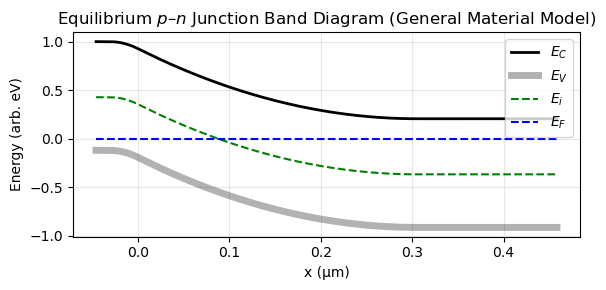

In [ ]:
@dataclass
class EnergyBands:
  x:   np.ndarray  # position (m)
  phi: np.ndarray  # electrostatic potential (V)
  E_C: np.ndarray  # conduction band (eV, referenced)
  E_V: np.ndarray  # valence band (eV, referenced)
  E_i: np.ndarray  # intrinsic level (eV, referenced)
  E_F: np.ndarray  # Fermi level (eV, referenced)

@dataclass
class CarrierProfiles:
  x: np.ndarray
  n: np.ndarray  # electron density (m^-3)
  p: np.ndarray  # hole density (m^-3)

@dataclass
class CurrentProfiles:
  x: np.ndarray
  Jn_drift: np.ndarray
  Jn_diff: np.ndarray
  Jn_total: np.ndarray
  Jp_drift: np.ndarray
  Jp_diff: np.ndarray
  Jp_total: np.ndarray
# ============================================================
# 3. PN Junction with General Material Model
# ============================================================

@dataclass
class PNJunction:
  material: SemiconductorMaterial
  doping: DopingProfile

  # State (filled by solve_equilibrium)
  x:        np.ndarray | None = None
  bands:    EnergyBands | None = None
  carriers: CarrierProfiles | None = None
  currents: CurrentProfiles | None = None

  # ---------- 3.1 Built-in potential / depletion widths ----------

  def builtin_potential(self) -> float:
    """
    Built-in potential:
      V_bi = (k_B T / q) ln(NA ND / n_i^2)
    """
    NA = self.doping.NA
    ND = self.doping.ND
    ni = self.material.n_i
    return (k_B * self.material.T / q) * np.log(NA * ND / ni**2)

  def depletion_widths(self, V_app: float = 0.0):
    """
    Depletion width for an abrupt PN junction at applied voltage V_app.
    Returns: (W, Wp, Wn).
    """
    NA = self.doping.NA
    ND = self.doping.ND
    eps_s = self.material.eps_s
    V_bi = self.builtin_potential()
    V_eff = V_bi - V_app

    W = np.sqrt(2 * eps_s / q * (NA + ND) / (NA * ND) * V_eff)
    Wn = W * NA / (NA + ND)
    Wp = W * ND / (NA + ND)
    return W, Wp, Wn

  # ---------- 3.2 Grid + space charge ----------
  def make_grid(self,
      V_app: float = 0.0,
      left_factor: float = 1.5,
      right_factor: float = 1.5,
      N: int = 600
  ) -> np.ndarray:
    """
    1D grid spanning beyond depletion region.
    """
    _, Wp, Wn = self.depletion_widths(V_app)
    x_left = -left_factor * Wp
    x_right = right_factor * Wn
    return np.linspace(x_left, x_right, N)

  def rho(self, x: np.ndarray, V_app: float = 0.0) -> np.ndarray:
    """
    Depletion approximation:
      rho(x) = -q NA in -Wp < x < 0
              = +q ND in  0 < x < Wn
              = 0 otherwise.
    """
    _, Wp, Wn = self.depletion_widths(V_app)
    NA = self.doping.NA
    ND = self.doping.ND

    rho = np.zeros_like(x)
    rho[(x >= -Wp) & (x < 0.0)] = -q * NA
    rho[(x > 0.0)  & (x <= Wn)] = +q * ND
    return rho

  # ---------- 3.3 Poisson solver ----------

  def solve_poisson(self, x: np.ndarray, V_app: float = 0.0):
    """
    Solve 1D Poisson equation:
      d^2 phi / dx^2 = -rho / eps_s
    with Dirichlet BC:
      phi(x_left) = 0
      phi(x_right) = V_bi - V_app.
    """
    N = x.size
    dx = x[1] - x[0]
    eps_s = self.material.eps_s
    V_bi = self.builtin_potential()
    V_right = V_bi - V_app
    rho_x = self.rho(x, V_app)

    A = np.zeros((N, N))
    b = np.zeros(N)

    for i in range(1, N-1):
        A[i, i-1] = 1.0 / dx**2
        A[i, i]   = -2.0 / dx**2
        A[i, i+1] = 1.0 / dx**2
        b[i]      = -rho_x[i] / eps_s

    # Dirichlet BC
    A[0, 0] = 1.0
    b[0]    = 0.0
    A[-1, -1] = 1.0
    b[-1]     = V_right

    phi = np.linalg.solve(A, b)

    E = np.zeros_like(x)
    E[1:-1] = -(phi[2:] - phi[:-2]) / (2 * dx)
    E[0]  = E[1]
    E[-1] = E[-2]

    return phi, E

  # ---------- 3.4 Energy bands from phi(x) ----------
  def compute_bands(self, x: np.ndarray, phi: np.ndarray) -> EnergyBands:
    """
    Compute E_C, E_V, E_i, E_F from phi(x), calibrated so that
    in the p-side bulk the intrinsic level E_i satisfies
        E_i - E_F = kT ln(NA / n_i)
    with E_F chosen as 0 everywhere (equilibrium).
    """
    mat = self.material
    Eg = mat.Eg
    Ei_offset = mat.E_i_offset      # E_i - E_V (eV)
    kT_eV = mat.kT_eV

    NA = self.doping.NA
    ni = mat.n_i

    # 1. Raw bands from electrostatic potential
    E_C_raw = -phi                 # eV (since 1 eV ↔ 1 V)
    E_V_raw = E_C_raw - Eg
    E_i_raw = E_V_raw + Ei_offset  # intrinsic level from valence band + offset

    # 2. Target intrinsic level in p-type bulk (take left edge as "bulk p")
    #    In p bulk:  E_i - E_F = kT ln(NA / n_i), and we set E_F = 0.
    Ei_target_p = kT_eV * np.log(NA / ni)
    idx_p = 0   # leftmost grid point ~ p-side quasi-neutral region

    # 3. Global vertical shift S so that E_i(x_p) matches Ei_target_p
    S = Ei_target_p - E_i_raw[idx_p]

    E_C = E_C_raw + S
    E_V = E_V_raw + S
    E_i = E_i_raw + S

    # 4. Flat Fermi level at equilibrium (reference: EF = 0 eV)
    E_F = np.zeros_like(x)

    bands = EnergyBands(
        x   = x,
        phi = phi,
        E_C = E_C,
        E_V = E_V,
        E_i = E_i,
        E_F = E_F
    )
    self.bands = bands
    return bands
  # ---------- 3.5 Carrier profiles from bands ----------
  def compute_carriers(self, bands: EnergyBands) -> CarrierProfiles:
    """
    Non-degenerate statistics:
      n = n_i exp((E_F - E_i)/kT),
      p = p_i exp((E_i - E_F)/kT).
    """
    ni = self.material.n_i
    pi = self.material.p_i
    kT_eV = self.material.kT_eV

    E_i = bands.E_i
    E_F = bands.E_F

    n_x = ni * np.exp((E_F - E_i) / kT_eV)
    p_x = pi * np.exp((E_i - E_F) / kT_eV)

    carriers = CarrierProfiles(
        x = bands.x,
        n = n_x,
        p = p_x
    )
    self.carriers = carriers
    return carriers

  # ---------- 3.6 Drift–diffusion currents ----------
  def compute_currents(self,
                        x: np.ndarray,
                        E: np.ndarray,
                        carriers: CarrierProfiles) -> CurrentProfiles:
      """
      Drift–diffusion:
        Jn = q n μ_n E + q D_n dn/dx
        Jp = q p μ_p E - q D_p dp/dx
      """
      mu_n = self.material.mu_n
      mu_p = self.material.mu_p
      kT = k_B * self.material.T

      D_n = kT / q * mu_n
      D_p = kT / q * mu_p

      n_x = carriers.n
      p_x = carriers.p

      dx = x[1] - x[0]

      dn_dx = np.zeros_like(n_x)
      dp_dx = np.zeros_like(p_x)
      dn_dx[1:-1] = (n_x[2:] - n_x[:-2]) / (2 * dx)
      dn_dx[0] = dn_dx[1]
      dn_dx[-1] = dn_dx[-2]

      dp_dx[1:-1] = (p_x[2:] - p_x[:-2]) / (2 * dx)
      dp_dx[0] = dp_dx[1]
      dp_dx[-1] = dp_dx[-2]

      Jn_drift = q * n_x * mu_n * E
      Jn_diff  = q * D_n * dn_dx
      Jn_total = Jn_drift + Jn_diff

      Jp_drift = q * p_x * mu_p * E
      Jp_diff  = -q * D_p * dp_dx
      Jp_total = Jp_drift + Jp_diff

      currents = CurrentProfiles(
          x        = x,
          Jn_drift = Jn_drift,
          Jn_diff  = Jn_diff,
          Jn_total = Jn_total,
          Jp_drift = Jp_drift,
          Jp_diff  = Jp_diff,
          Jp_total = Jp_total
      )
      self.currents = currents
      return currents

  # ---------- 3.7 High-level equilibrium solve ----------
  def solve_equilibrium(self,
                        V_app: float = 0.0,
                        left_factor: float = 1.5,
                        right_factor: float = 1.5,
                        N: int = 600):
      """
      Full equilibrium solve:
        - build x grid
        - solve Poisson -> phi, E
        - compute bands (E_C, E_V, E_i, E_F)
        - compute carriers (n, p)
        - compute drift–diffusion currents
      """
      x = self.make_grid(
        V_app=V_app,
        left_factor=left_factor,
        right_factor=right_factor,
        N=N)
      phi, E = self.solve_poisson(x, V_app=V_app)
      bands = self.compute_bands(x, phi)
      carriers = self.compute_carriers(bands)
      currents = self.compute_currents(x, E, carriers)

      self.x = x
      return self  # allow chaining


# ============================================================
# 4. Example: Silicon-like PN Junction at 300 K
# ============================================================

def make_silicon_300K() -> SemiconductorMaterial:
    """
    Rough silicon parameters at 300 K, in SI units:
      Nc ≈ 2.8e25 m^-3 (2.8e19 cm^-3),
      Nv ≈ 1.04e25 m^-3 (1.04e19 cm^-3),
      Eg ≈ 1.12 eV,
      chi ≈ 4.05 eV,
      eps_r ≈ 11.7.
    """
    Nc = 2.8e25    # m^-3
    Nv = 1.04e25   # m^-3
    return SemiconductorMaterial(
        Eg    = 1.12,
        chi   = 4.05,
        eps_r = 11.7,
        Nc    = Nc,
        Nv    = Nv,
        mu_n  = 1350e-4,
        mu_p  =  480e-4,
        T     = 300.0
    )


# Material + doping
silicon = make_silicon_300K()
doping = DopingProfile(
    p = PTypeRegion(NA = 1e17 * 1e6),   # 1e17 cm^-3
    n = NTypeRegion(ND = 1e16 * 1e6)    # 1e16 cm^-3
)

pn = PNJunction(material=silicon, doping=doping)

silicon.summary()
doping.summary()

V_bi = pn.builtin_potential()
W, Wp, Wn = pn.depletion_widths()
print(f"\nV_bi = {V_bi:.3f} V")
print(f"W   = {W*1e6:.2f} µm  (Wp = {Wp*1e6:.2f} µm, Wn = {Wn*1e6:.2f} µm)")

pn.solve_equilibrium(V_app=0.0)
bands = pn.bands

# Band diagram
x_um = bands.x * 1e6
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(x_um, bands.E_C, 'k', lw=2, label=r"$E_C$")
ax.plot(x_um, bands.E_V, 'k', lw=5, alpha=0.3, label=r"$E_V$")
ax.plot(x_um, bands.E_i, 'g--', lw=1.5, label=r"$E_i$")
ax.plot(x_um, bands.E_F, 'b--', lw=1.5, label=r"$E_F$")
ax.set_xlabel("x (µm)")
ax.set_ylabel("Energy (arb. eV)")
ax.set_title("Equilibrium $p$–$n$ Junction Band Diagram (General Material Model)")
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

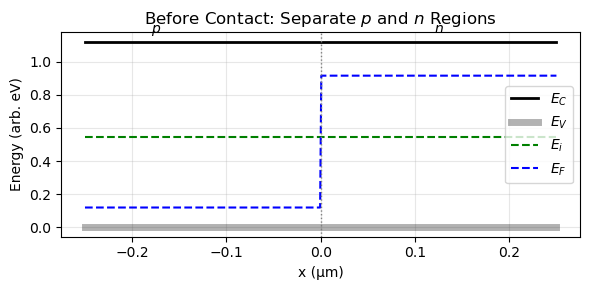

In [22]:
# ---------------------------------------------
# Pre-contact band diagram (before equilibrium)
# ---------------------------------------------

mat = silicon
dop = doping

Eg      = mat.Eg
Ei_off  = mat.E_i_offset      # E_i - E_V (eV)
kT_eV   = mat.kT_eV
ni      = mat.n_i
NA      = dop.NA
ND      = dop.ND

# Choose a convenient energy reference:
#   E_V = 0, E_C = Eg, E_i = Ei_off
E_V0 = 0.0
E_C0 = Eg
E_i0 = Ei_off

# Fermi levels in separate, isolated p and n samples:
#   p-side:  E_i - E_F = kT ln(NA / n_i)
#   n-side:  E_F - E_i = kT ln(ND / n_i)
E_Fp = E_i0 - kT_eV * np.log(NA / ni)   # p-type bulk
E_Fn = E_i0 + kT_eV * np.log(ND / ni)   # n-type bulk

# Build a simple 1D axis: left = p, right = n
L = 0.25e-6    # arbitrary half-width, 0.25 µm each side
x_pre = np.linspace(-L, L, 400)
x_um_pre = x_pre * 1e6

E_C_pre = np.full_like(x_pre, E_C0)
E_V_pre = np.full_like(x_pre, E_V0)
E_i_pre = np.full_like(x_pre, E_i0)

E_F_pre = np.where(x_pre < 0.0, E_Fp, E_Fn)

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(x_um_pre, E_C_pre, 'k', lw=2, label=r"$E_C$")
ax.plot(x_um_pre, E_V_pre, 'k', lw=5, alpha=0.3, label=r"$E_V$")
ax.plot(x_um_pre, E_i_pre, 'g--', lw=1.5, label=r"$E_i$")
ax.plot(x_um_pre, E_F_pre, 'b--', lw=1.5, label=r"$E_F$")

# Mark the interface between the separate p and n samples
ax.axvline(0.0, color='gray', linestyle=':', linewidth=1)
ax.text(-0.18, E_C0 + 0.05, r"$p$", fontsize=10)
ax.text(+0.12, E_C0 + 0.05, r"$n$", fontsize=10)

ax.set_xlabel("x (µm)")
ax.set_ylabel("Energy (arb. eV)")
ax.set_title("Before Contact: Separate $p$ and $n$ Regions")
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()


=== Semiconductor Material Parameters ===
T        = 300 K
Eg       = 1.12 eV
eps_s    = 1.036e-10 F/m
ni       = 1.000e+16 m^-3
mu_n     = 1.350e-01 m^2/Vs
mu_p     = 4.800e-02 m^2/Vs
kT (eV)  = 0.0259 eV
=== Doping Profile ===
NA = 1.000e+23 m^-3
ND = 1.000e+22 m^-3

V_bi = 0.774 V
W   = 0.33 µm  (Wp = 0.03 µm, Wn = 0.30 µm)


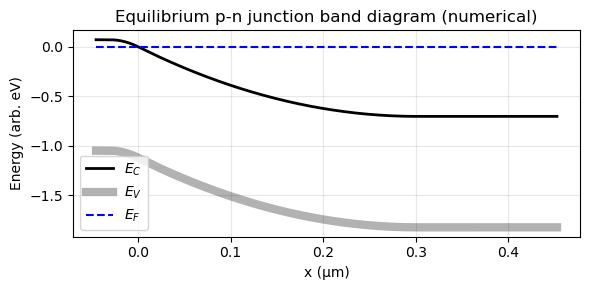

In [4]:

# -------------------------------------------------------------------
# 2. Example usage: equilibrium p-n junction
# -------------------------------------------------------------------

silicon = SemiconductorMaterial(
    T     = 300,
    Eg    = 1.12,
    eps_r = 11.7,
    ni    = 1e10 * 1e6,   # 1e10 cm^-3 -> 1e16 m^-3
    mu_n  = 1350e-4,
    mu_p  =  480e-4
)

doping_profile = DopingProfile(
    NA = 1e17 * 1e6,      # 1e17 cm^-3 -> 1e23 m^-3
    ND = 1e16 * 1e6       # 1e16 cm^-3 -> 1e22 m^-3
)

pn = PNJunction(material=silicon, doping=doping_profile)

silicon.summary()
doping_profile.summary()

V_bi = pn.builtin_potential()
W, Wp, Wn = pn.depletion_widths(V_app=0.0)
print(f"\nV_bi = {V_bi:.3f} V")
print(f"W   = {W*1e6:.2f} µm  (Wp = {Wp*1e6:.2f} µm, Wn = {Wn*1e6:.2f} µm)")

# Grid, Poisson, bands, carriers
x = pn.make_grid(V_app=0.0, left_factor=1.5, right_factor=1.5, N=600)
phi, E = pn.solve_poisson(x, V_app=0.0)
EC, EV, EF = pn.band_edges(x, phi)
n_x, p_x = pn.carrier_profiles(EC, EV, EF)
J = pn.currents(x, E, n_x, p_x)

# Quick band diagram plot (for notebook)
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(x*1e6, EC, 'k', lw=2, label=r"$E_C$")
ax.plot(x*1e6, EV, 'k', lw=6, alpha=0.3, label=r"$E_V$")
ax.plot(x*1e6, EF, 'b--', lw=1.5, label=r"$E_F$")
ax.set_xlabel("x (µm)")
ax.set_ylabel("Energy (arb. eV)")
ax.set_title("Equilibrium p-n junction band diagram (numerical)")
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()


In [5]:
# Helper: kT in eV
kT_eV = k_B * T / q

# Intrinsic level Ei at midgap (referenced to 0 eV for convenience)
Ei_p = 0.0
Ei_n = 0.0

# Fermi levels relative to Ei (in eV)
EF_minus_Ei_p = -kT_eV * np.log(NA / ni)   # p-type: EF below Ei
EF_minus_Ei_n = +kT_eV * np.log(ND / ni)   # n-type: EF above Ei

EF_p = Ei_p + EF_minus_Ei_p
EF_n = Ei_n + EF_minus_Ei_n

# Conduction and valence band edges (relative to Ei = 0)
EC_p = Ei_p + Eg/2
EV_p = Ei_p - Eg/2

EC_n = Ei_n + Eg/2
EV_n = Ei_n - Eg/2

print(f"E_Fp = {EF_p:.3f} eV,  E_Fn = {EF_n:.3f} eV")

# --- Plot panel (a): separate regions ---
fig, ax = plt.subplots(figsize=(6, 3))

# x positions: p-region (-1 to 0), n-region (0 to 1)
x_p = np.linspace(-1.0, 0.0, 2)
x_n = np.linspace(0.0, 1.0, 2)

# p side
ax.plot(x_p, EC_p * np.ones_like(x_p), 'k', lw=2, label=r"$E_C$")
ax.plot(x_p, EV_p * np.ones_like(x_p), 'k', lw=6, alpha=0.3, label=r"$E_V$")
ax.plot(x_p, EF_p * np.ones_like(x_p), 'b--', lw=1.5, label=r"$E_F$")

# n side
ax.plot(x_n, EC_n * np.ones_like(x_n), 'k', lw=2)
ax.plot(x_n, EV_n * np.ones_like(x_n), 'k', lw=6, alpha=0.3)
ax.plot(x_n, EF_n * np.ones_like(x_n), 'b--', lw=1.5)

# Visual labels for regions
ax.text(-0.5, EV_p - 0.2, "p", ha="center", va="top")
ax.text(0.5, EV_n - 0.2, "n", ha="center", va="top")

ax.set_xlabel("position (arbitrary)")
ax.set_ylabel("Energy (eV)")
ax.set_title("Before contact: separate p and n regions")
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(EV_p - 0.6, EC_p + 0.6)
ax.legend(loc="upper right")
ax.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()


NameError: name 'T' is not defined

In [ ]:
def get_builtin_potential(NA, ND, ni, T):
    return (k_B * T / q) * np.log(NA * ND / ni**2)

def depletion_widths(NA, ND, V_bi, V, eps_s):
    W = np.sqrt(2 * eps_s / q * (NA + ND) / (NA * ND) * (V_bi - V))
    Wn = W * NA / (NA + ND)
    Wp = W * ND / (NA + ND)
    return W, Wp, Wn

V_bi = get_builtin_potential(NA, ND, ni, T)
W, Wp, Wn = depletion_widths(NA, ND, V_bi, 0.0, eps_s)

print(f"V_bi = {V_bi:.3f} V")
print(f"W   = {W*1e6:.2f} µm  (Wp = {Wp*1e6:.2f} µm, Wn = {Wn*1e6:.2f} µm)")


V_bi = 0.774 V
W   = 0.33 µm  (Wp = 0.03 µm, Wn = 0.30 µm)


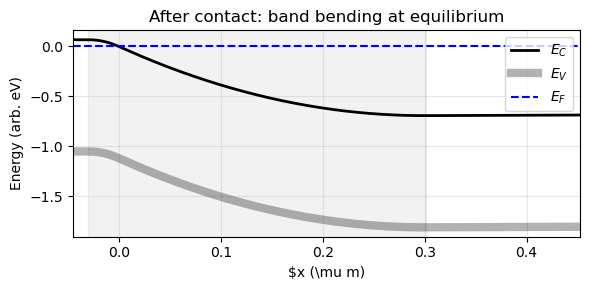

In [ ]:
def rho_profile(x, Wp, Wn, NA, ND):
    rho = np.zeros_like(x)
    rho[(x >= -Wp) & (x < 0.0)] = -q * NA
    rho[(x > 0.0) & (x <= Wn)] = +q * ND
    return rho

def solve_poisson_1D(x, rho, eps_s):
    dx = x[1] - x[0]

    E = np.zeros_like(x)
    for i in range(1, len(x)):
        E[i] = E[i-1] + 0.5 * (rho[i-1] + rho[i]) / eps_s * dx

    phi = np.zeros_like(x)
    for i in range(1, len(x)):
        phi[i] = phi[i-1] - 0.5 * (E[i-1] + E[i]) * dx

    return E, phi

# Grid across depletion + small neutral regions
x = np.linspace(-1.5*Wp, 1.5*Wn, 600)
rho = rho_profile(x, Wp, Wn, NA, ND)
E_field, phi = solve_poisson_1D(x, rho, eps_s)

# Convert phi (V) to "energy" (eV) up to constant: EC = -phi + const
phi_eV = phi  # numerically same scale if we call 1 V -> 1 eV for plotting
EC = -phi_eV
EV = EC - Eg

# Shift so EF is ~0 at x=0
idx0 = np.argmin(np.abs(x))
shift = EC[idx0]  # choose EC at junction as reference
EC -= shift
EV -= shift
EF_line = np.zeros_like(x)  # E_F = 0

# --- Plot panel (b): band bending ---
fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(x*1e6, EC, 'k', lw=2, label=r"$E_C$")
ax.plot(x*1e6, EV, 'k', lw=6, alpha=0.3, label=r"$E_V$")
ax.plot(x*1e6, EF_line, 'b--', lw=1.5, label=r"$E_F$")

# Shade depletion region
ax.axvspan(-Wp*1e6, Wn*1e6, color='gray', alpha=0.1)

ax.set_xlabel(r"$x (\mu m)")
ax.set_ylabel("Energy (arb. eV)")
ax.set_title("After contact: band bending at equilibrium")
ax.set_xlim(x[0]*1e6, x[-1]*1e6)
ax.grid(True, alpha=0.3)
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


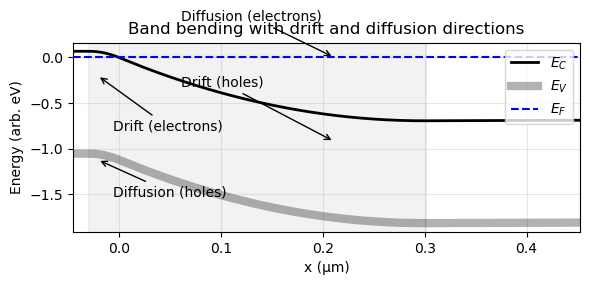

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(x*1e6, EC, 'k', lw=2, label=r"$E_C$")
ax.plot(x*1e6, EV, 'k', lw=6, alpha=0.3, label=r"$E_V$")
ax.plot(x*1e6, EF_line, 'b--', lw=1.5, label=r"$E_F$")

ax.axvspan(-Wp*1e6, Wn*1e6, color='gray', alpha=0.1)

# Example arrow positions (adjust if needed)
# Electron diffusion (n -> p)
ax.annotate("Diffusion (electrons)",
            xy=(0.7*Wn*1e6, EC[idx0]),
            xytext=(0.2*Wn*1e6, EC[idx0]+0.4),
            arrowprops=dict(arrowstyle="->"))

# Electron drift (p -> n)
ax.annotate("Drift (electrons)",
            xy=(-0.7*Wp*1e6, EC[idx0]-0.2),
            xytext=(-0.2*Wp*1e6, EC[idx0]-0.8),
            arrowprops=dict(arrowstyle="->"))

# Hole diffusion (p -> n)
ax.annotate("Diffusion (holes)",
            xy=(-0.7*Wp*1e6, EV[idx0]),
            xytext=(-0.2*Wp*1e6, EV[idx0]-0.4),
            arrowprops=dict(arrowstyle="->"))

# Hole drift (n -> p)
ax.annotate("Drift (holes)",
            xy=(0.7*Wn*1e6, EV[idx0]+0.2),
            xytext=(0.2*Wn*1e6, EV[idx0]+0.8),
            arrowprops=dict(arrowstyle="->"))

ax.set_xlabel("x (µm)")
ax.set_ylabel("Energy (arb. eV)")
ax.set_title("Band bending with drift and diffusion directions")
ax.set_xlim(x[0]*1e6, x[-1]*1e6)
ax.grid(True, alpha=0.3)
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()
